지난 작품들을 통해 다음 드라마의 초반 5~10화 정도의 시청률을 예측하고 이를 통해 정해진 회차(내가 선택)의 시청률을 예측해 보자

In [1]:
import pandas as pd
import numpy as np
import os

## 데이터 설명
1. 요일 0: 토요일, 1: 일요일
2. 배우는 출연한 영화와 방송의 횟수, 수상경력을 대상3, 최우수&우수 2, 기타 1로 카운트
3. CPI(CONTENT POWER INDEX) : 콘텐츠 영향력 지수
4. 미세먼지 : 미세먼지 농도를 나타내고 미세먼지가 강하면 집에 있을 가능성이 높기에 드라마 시청 확률에 영향을 줄 수 있다.
5. 연출자 & 작가 : 이전에 했던 드라마 중 시청률 20%넘은 작품수와 수상경력을 카운트
6. 특이사항 0: 없음, 1: 있음 - 월드컵, 아시안컵, 올림픽, 추석연휴, 설날연휴 등 방송편성시간 변경

In [2]:
# Data
path = os.getcwd()
df = pd.read_csv(path+"/drama.csv")
print("\t============================\n\tDATA shape is {}\n\t============================".format(df.shape))
df.head()

	DATA shape is (784, 14)


,드라마,날짜,회차,요일,배우,CPI,CPI증감률,경제성장률,실업률,미세먼지,연출자,작가,특이사항,시청률
0,넝쿨째 굴러온 당신 (2012.02.25~2012.09.09),2012.02.25,1,0,75,96.436,2.9,0.7,4.2,47,5,10,0,22.3
1,넝쿨째 굴러온 당신 (2012.02.25~2012.09.09),2012.02.26,2,1,75,96.436,2.9,0.7,4.2,47,5,10,0,28.9
2,넝쿨째 굴러온 당신 (2012.02.25~2012.09.09),2012.03.03,3,0,75,96.436,2.9,0.7,3.7,43,5,10,0,25.7
3,넝쿨째 굴러온 당신 (2012.02.25~2012.09.09),2012.03.04,4,1,75,96.436,2.9,0.7,3.7,43,5,10,0,29.9
4,넝쿨째 굴러온 당신 (2012.02.25~2012.09.09),2012.03.10,5,0,75,96.436,2.9,0.7,3.7,43,5,10,0,26.9


### Random Forest를 위해 ['회차','요일','배우','미세먼지','연출자','작가','특이사항','시청률']만 뽑아서 사용한다.

In [3]:
data = df[['회차','요일','배우','미세먼지','연출자','작가','특이사항','시청률']]
data.head()

,회차,요일,배우,미세먼지,연출자,작가,특이사항,시청률
0,1,0,75,47,5,10,0,22.3
1,2,1,75,47,5,10,0,28.9
2,3,0,75,43,5,10,0,25.7
3,4,1,75,43,5,10,0,29.9
4,5,0,75,43,5,10,0,26.9


In [4]:
data.rename(columns={'회차': 'Episode', '요일': 'Day', '배우': 'Actor', '미세먼지': 'Dust',
                     '연출자': 'Director', '작가': 'Author', '특이사항': 'Exception', '시청률': 'Rating'}, inplace=True)

/home/smsm8898/miniconda3/envs/tf/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [5]:
data.head()

,Episode,Day,Actor,Dust,Director,Author,Exception,Rating
0,1,0,75,47,5,10,0,22.3
1,2,1,75,47,5,10,0,28.9
2,3,0,75,43,5,10,0,25.7
3,4,1,75,43,5,10,0,29.9
4,5,0,75,43,5,10,0,26.9


In [6]:
# min/max Scailing
data['Rating'] = (data['Rating']-data['Rating'].min())/(data['Rating'].max()-data['Rating'].min())      

data['Rate'] = 0
for i in range(784):
    if data['Rating'][i]<=0.2:
        data['Rate'][i] = 1
    elif data['Rating'][i]<=0.4:
        data['Rate'][i] = 2
    elif data['Rating'][i]<=0.6:
        data['Rate'][i] = 3
    elif data['Rating'][i]<=0.8:
        data['Rate'][i] = 4
    else:
        data['Rate'][i] = 5

/home/smsm8898/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/smsm8898/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/smsm8898/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

In [7]:
data.drop('Rating',axis = 1,inplace = True)
data

/home/smsm8898/miniconda3/envs/tf/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Episode,Day,Actor,Dust,Director,Author,Exception,Rate
0,1,0,75,47,5,10,0,2
1,2,1,75,47,5,10,0,3
2,3,0,75,43,5,10,0,2
3,4,1,75,43,5,10,0,3
4,5,0,75,43,5,10,0,2
...,...,...,...,...,...,...,...,...
779,50,1,63,24,3,6,0,3
780,51,0,63,24,3,6,0,3
781,52,1,63,24,3,6,0,3
782,53,0,63,24,3,6,0,3


In [8]:
data.describe()

,Episode,Day,Actor,Dust,Director,Author,Exception,Rate
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,26.682398,0.503827,66.491071,42.697704,3.547194,7.492347,0.054847,2.674745
std,15.181655,0.500305,7.719536,13.573101,1.196127,3.350522,0.227827,0.899879
min,1.000000,0.000000,53.000000,19.000000,1.000000,2.000000,0.000000,1.000000
25%,14.000000,0.000000,61.000000,32.000000,3.000000,5.000000,0.000000,2.000000
50%,27.000000,1.000000,65.000000,42.000000,3.000000,6.000000,0.000000,3.000000
75%,40.000000,1.000000,74.000000,49.000000,5.000000,11.000000,0.000000,3.000000
max,58.000000,1.000000,79.000000,91.000000,5.000000,13.000000,1.000000,5.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# temp = data

# sns.pairplot(temp, hue='Rating')

# 1. 목표 
### 기존의 15개의 주말 Drama 시청률을 통해 다음 Drama 시청률 예측하기

# 2. 계획
0. 15개의 드라마를 통해 supervised learning을 한다.
1. 먼저 드라마 별로 변수를 나눈다.
2. 선택된 feature를 통해 training을 한다.
3. 75%를 train으로 25%를 test로 사용한다

### 다양한 Regrssion을 이용하여 Model Training하기

In [10]:
# Normalize
data_norm = (data.iloc[:,:-1]-data.iloc[:,:-1].mean())/data.iloc[:,:-1].std()
print(data_norm.shape)
data_norm

(784, 7)


,Episode,Day,Actor,Dust,Director,Author,Exception
0,-1.691673,-1.007040,1.102259,0.316972,1.214592,0.748437,-0.24074
1,-1.625804,0.991743,1.102259,0.316972,1.214592,0.748437,-0.24074
2,-1.559935,-1.007040,1.102259,0.022272,1.214592,0.748437,-0.24074
3,-1.494066,0.991743,1.102259,0.022272,1.214592,0.748437,-0.24074
4,-1.428197,-1.007040,1.102259,0.022272,1.214592,0.748437,-0.24074
...,...,...,...,...,...,...,...
779,1.535906,0.991743,-0.452239,-1.377556,-0.457471,-0.445407,-0.24074
780,1.601775,-1.007040,-0.452239,-1.377556,-0.457471,-0.445407,-0.24074
781,1.667644,0.991743,-0.452239,-1.377556,-0.457471,-0.445407,-0.24074
782,1.733513,-1.007040,-0.452239,-1.377556,-0.457471,-0.445407,-0.24074


In [11]:
# Train & Test Split
test_size=0.75
row_size = int(df.shape[0]*test_size)

X_train, y_train, X_test, y_test = data_norm.iloc[:row_size,:-1], data.iloc[:row_size,-1:],data_norm.iloc[row_size:,:-1],data.iloc[row_size:,-1:]


In [29]:
result = list()

### Logistic Regression

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 4 3 4 3 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 2 3 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3]
			Model Logistic Regression Report 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.66      0.91      0.76        64
           3       0.70      0.54      0.61        85
           4       0.50      0.64      0.56        33
           5       0.00      0.00      0.00        12

    accuracy                           0.64       196
   macro avg       0.37      0.42      0.39       196
weighted avg       0.60      0.64      0.61       196

Accuracy for RF: 63.78
[[ 0  1  1  0  0]
 [ 0 58  6  0  0]
 [ 0 29 46 10  0

/home/smsm8898/miniconda3/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/smsm8898/miniconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/smsm8898/miniconda3/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/smsm8898/miniconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precis

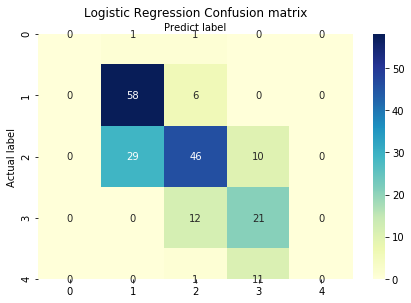

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
    
# 학습 진행
LR = LogisticRegression()
LR.fit(X_train, y_train)

# 예측
y_pred = LR.predict(X_test)
print(y_pred)

print('\t\t\tModel Logistic Regression Report \n{}'.format(classification_report(y_test, y_pred)))
# 정확도 확인
print('Accuracy for RF: %.2f' %(metrics.accuracy_score(y_test, y_pred)* 100))
# Confusion Matrix(Heat Map)
cnf_metrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_metrix)

class_names = ['Rate']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# 히트맨 생성
sns.heatmap(pd.DataFrame(cnf_metrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Logistic Regression Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predict label")
plt.show()

result.append(metrics.accuracy_score(y_test, y_pred))

### RandomForest

/home/smsm8898/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[3 2 3 2 3 2 3 2 3 2 3 3 3 2 3 3 4 3 4 3 4 3 4 3 5 4 5 4 5 3 3 3 4 5 5 4 5
 4 5 2 2 2 2 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 3 2 3 2 3 2 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 1 2 2 2 2 2 2 2 2 3 2 3 2 3 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 5 4 5 4 5 4 5 4 5 4 5 4 5 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 3 3 3 3 3 3 2 3 2
 3 2 3 2 3 3 4 3 3 3 3]
			Model Random Forest Report 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.80      0.81      0.81        64
           3       0.73      0.75      0.74        85
           4       0.57      0.48      0.52        33
           5       0.64      0.75      0.69        12

    accuracy                           0.72       196
   macro avg       0.55      0.56      0.55       196
weighted avg       0.71      0.72      0.71       196

Accuracy for RF: 71.94
[[ 0  2  0  0  0]
 [ 1 52 11  0  0]
 [ 0  9 64 11  1]
 [ 0

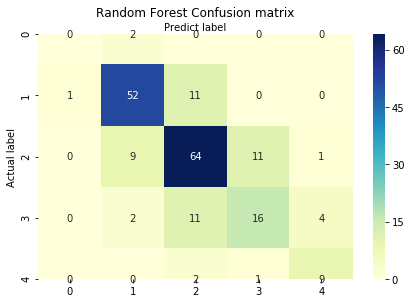

In [45]:
from sklearn.ensemble import RandomForestClassifier    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)

# 예측
y_pred = forest.predict(X_test)
print(y_pred)

print('\t\t\tModel Random Forest Report \n{}'.format(classification_report(y_test, y_pred)))
# 정확도 확인
print('Accuracy for RF: %.2f' %(metrics.accuracy_score(y_test, y_pred)* 100))
# Confusion Matrix(Heat Map)
cnf_metrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_metrix)

class_names = ['Rate']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# 히트맨 생성
sns.heatmap(pd.DataFrame(cnf_metrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Random Forest Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predict label")
plt.show()

result.append(metrics.accuracy_score(y_test, y_pred))

### XGBoost

/home/smsm8898/miniconda3/envs/tf/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/smsm8898/miniconda3/envs/tf/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3 2 3 2 3 2 3 2 3 3 3 3 3 3 3 3 4 3 4 3 4 3 4 3 4 4 5 4 5 3 5 5 3 5 5 3 5
 4 5 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 3 3 4 1 2 1 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 2 3 2 3
 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 5 4 5 4 5 4 5 4 5 4 5 4 5 2 2 2 2 2 2
 2 2 2 2 2 2 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 3 3 3 3 3 4]
			Model XGboost Report 
              precision    recall  f1-score   support

           1       0.50      0.50      0.50         2
           2       0.76      0.92      0.83        64
           3       0.76      0.66      0.70        85
           4       0.56      0.45      0.50        33
           5       0.67      0.83      0.74        12

    accuracy                           0.72       196
   macro avg       0.65      0.67      0.66       196
weighted avg       0.71      0.72      0.71       196

Accuracy for model: 71.94
[[ 1  1  0  0  0]
 [ 1 59  4  0  0]
 [ 0 18 56 10  1]
 [ 0  0

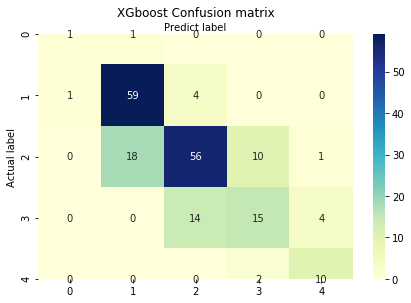

In [46]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
train_model = XGB.fit(X_train, y_train)

# 예측
y_pred = XGB.predict(X_test)
print(y_pred)

print('\t\t\tModel XGboost Report \n{}'.format(classification_report(y_test, y_pred)))
print("Accuracy for model: %.2f" % (accuracy_score(y_test, y_pred) * 100))

# Confusion Matrix(Heat Map)
cnf_metrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_metrix)

class_names = ['Rate']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# 히트맨 생성
sns.heatmap(pd.DataFrame(cnf_metrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("XGboost Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predict label")
plt.show()

result.append(metrics.accuracy_score(y_test, y_pred))

### LightGBM

[3 2 3 2 3 2 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 4 5 3 3 5 4 5 5 4 5
 4 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 2 3 2 3 3 2 3 2 3 2 3
 3 3 3 3 3 3 2 3 3 3 2 3 3 3 4 1 2 1 2 2 2 2 2 2 2 2 2 2 1 2 3 2 2 2 3 2 3
 3 3 3 3 3 3 3 4 4 3 4 4 4 4 4 4 4 4 5 4 5 4 5 4 5 4 5 4 5 4 5 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 3 4 2 4 2 4]
			Model LightGBM Report 
              precision    recall  f1-score   support

           1       0.33      0.50      0.40         2
           2       0.70      0.92      0.80        64
           3       0.68      0.56      0.62        85
           4       0.50      0.36      0.42        33
           5       0.64      0.75      0.69        12

    accuracy                           0.66       196
   macro avg       0.57      0.62      0.59       196
weighted avg       0.65      0.66      0.64       196

Accuracy for model: 65.82
[[ 1  1  0  0  0]
 [ 1 59  4  0  0]
 [ 1 23 48 12  1]
 [ 0  

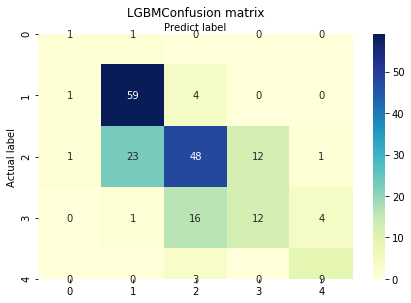

In [47]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

LGBM = LGBMClassifier()
train_model = LGBM.fit(X_train, y_train)

# 예측
y_pred = LGBM.predict(X_test)
print(y_pred)

print('\t\t\tModel LightGBM Report \n{}'.format(classification_report(y_test, y_pred)))
print("Accuracy for model: %.2f" % (accuracy_score(y_test, y_pred) * 100))

# Confusion Matrix(Heat Map)
cnf_metrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_metrix)

class_names = ['Rate']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# 히트맨 생성
sns.heatmap(pd.DataFrame(cnf_metrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("LGBMConfusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predict label")
plt.show()

result.append(metrics.accuracy_score(y_test, y_pred))

In [34]:
result

[0.6377551020408163,
 0.7091836734693877,
 0.7193877551020408,
 0.6581632653061225]

In [42]:
print("Logisitc classification's accuracy is %.2f"%(result[0]*100))
print("Random Forest classification's accuracy is %.2f"%(result[1]*100))
print("XGBoost classification's accuracy is %.2f"%(result[2]*100))
print("LightGMB classification's accuracy is %.2f"%(result[3]*100))
print("\nTherefore, XGB is the best model to predict audience rating")

Logisitc classification's accuracy is 63.78
Random Forest classification's accuracy is 70.92
XGBoost classification's accuracy is 71.94
LightGMB classification's accuracy is 65.82

Therefore, XGB is the best model to predict audience rating


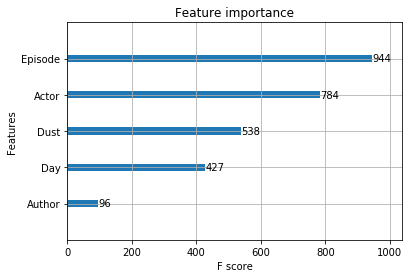

In [43]:
from numpy import loadtxt
from xgboost import plot_importance

plot_importance(XGB)
plt.show()